# Aircraft Saftey Analysis


**Author:** Noah Meakins
***


![Boeing 787.webp](<images/Boeing 787.webp>)

# Overview

This in-depth analysis is intended to guide our company's foray into the commercial and private aviation sectors. By identifying historical safety risks and the most common causes of serious accidents, we aim to implement best practices and safety standards that surpass industry norms. This proactive approach to safety and risk analysis will be foundational in establishing our company as a responsible and trustworthy player in the aviation industry.

### Business Problem

My company is expanding into new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises but do not know anything about the potential risks of aircraft. I have been tasked with determining which aircraft are the lowest risk for the company to start this new business endeavor. With the data I will gather from the attached dataset, I will provide insights that will assist the head of the new aviation division, which can then use those insights to help decide which aircraft to purchase. Some specific data I will be analyzing at a deeper level are Country, Location, Make, Model, Number of Engines, Engine Type, Weather Conditions, Injury Severity, and Aircraft Damage. Some questions I will be asking myself during this analysis are:

1. Out of the columns that might have missing data, what methods should I implement for columns that I will need in my analysis? 
2. What Charts will be beneficial in presenting a visual representation of my analysis? 
3. How will I determine the safest and most profitable aircraft to invest in? 

These questions are important from a business perspective because if the data in my analysis is skewed due to missing data or data that doesn’t pertain to this analysis, it can negatively influence business decisions.  
***

### Data Understanding

- The data for this project was sourced from the National Transportation Safety Board and includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. It's relevant to my analysis as we aim to understand various aircraft models and the levels of safety associated with them. 

- The dataset consists of individual aircraft accidents, each record detailing the accident. It includes data from incidents in the United States and international waters. Key variables include Country, Location, Make, Model, Number of Engines, Engine Type, Weather Conditions, Injury Severity, and Aircraft Damage. 

- For this analysis, in line with our company's focus on safety and risk assessment, the primary target variable is 'total fatal injuries'. Analyzing this variable will help us assess the severity of accidents and understand the safety challenges inherent in the aviation industry, especially pertinent to commercial and private flight operations.

***

![NTSB Logo.webp](<images/NTSB Logo.webp>)

***
# Initial Investigation of the Original Dataset
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 200) # I wanted to see all the columns in the dataset when printing the dataframe
pd.set_option('max_rows', 20000) # I wanted to see as many rows as I needed to at any given time in the dataset when printing the dataframe
%matplotlib inline

***
Above you can see I have added some pandas options to the cell above. "pd.set_option" along with the "max_columns" and "max_rows" alows me to see more of the data when printing a pandas dataframe. This can be helpful when you want to see more than the default amount that pandas will print. It is not needed but can make things a bit easier when printing dataframes. 
*** 

In [2]:
df = pd.read_csv('/Users/unit66/Downloads/AviationData.csv', encoding='latin-1', low_memory=False)

In [3]:
df.shape

(88889, 31)

***
This is a relatively large dataset. From the research completed on this dataset before importing it into my notebook, I noticed that there are some aircraft that most likely will not benefit my companies business needs for my first steps into commercial and private enterprises. For example, Hot Air Balloons, Gliders, and Hobbyist Aircraft are not potential aircraft for the business problem at hand. With that being said, in preparation for my analysis of this dataset, I will be removing any aircraft that will not benefit my analysis. 
*** 

In [4]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

***
### Columns I Will Remove
As shown above, you can see that there are many columns that will not be needed for my analysis. Later in my prep for analysis, you will see what columns I will end up keeping, and ones that I believe will not be needed for this analysis. This will minimize clutter of the dataset as a whole and will make my work more efficient in determining potential aircraft for this business endeavor. For example, the following columns will not be needed for my anlysis, and I will be removing them later in this notbook: 
- Event.Id
- Accident.Number
- Latitude 
- Longitude 
- Airport.Code
- Airport.Name
- Registration.Number
- FAR.Description
- Schedule
- Air.carrier
- Report.Status
- Publication.Date

There are multiple reason why I feel these columns arent needed, but the main reason is these columns seem to be used for record keeping tasks within the NTSB to keep their data organized in a way they can easily refrence specific data. Also, columns like "Airport.Name" will not be beneficial to my analysis. 
*** 

In [5]:
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

***
### Data Types and What Will Need To Be Changed

When looking into the data types of each coliumn in this dataset, I notice that the "Event.Date" is not a pandas datetime data type. This will be an easy fix and you will see this change later in my notebook. As far as the rest of the columns in this dataset, are the correct data types they are meant to be. The only that may raise concern and could possibly need to be changed is the "Airport.Code" column, two reason why I am not too woried about this is due to the fact that the "Airport.Code" might have letters along with numbers depending on what the "Airport.Code" consists of. The second reason I am not worreid is because we are not going to be utilizing this column in my analysis. Above you can see that it is in my list of columns to be removed.  
*** 

In [6]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

***
When using the ".info()" function, I first notice that a majority of my columns contains various amounts of missing data. This will have to be managed before I move on to my analysis and modeling of this data. I will notice a change in the amounts after removing columns but there still will be columns I will have to clean up prior to my analysis. There are a few methods that I could use to accomplish this, but I plan on using imputation methods in order to keep as much data as I can. With this being said, I will have to make sure to choose what methods I use wisely in order to keep my data set from becoming skewed or biased in various ways. 
***

***
### Aviation Data 
The Aviation dataset consists of records from 1962 to 2023, and contains a large amount of information on Event Date, Location, Aircraft Damage, Injury Severity, and Total Fatal Injuries. I will start by removing columns that wont benefit the goal of the analysis and formatting the columns I decide to keep. This will consist of making each column name normalized, cleaning missing data, and combining columns where I can. The primary goal of the next step in this analysis is making sure the data I do decide to use is clean and will provide us the accurate data we need to make a successful business decision. 
***

In [8]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data Preparation

In [9]:
# Subsetting the data to only include the columns I want to work with and making a copy of the dataframe
df = df[[#'Event.Id', 
       'Investigation.Type', 
       # 'Accident.Number', 
       'Event.Date',
       'Location', 'Country', 
       # 'Latitude', 'Longitude', 'Airport.Code',
       # 'Airport.Name', 
       'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 
       # 'Registration.Number', 
       'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 
       # 'FAR.Description',
       # 'Schedule', 
       'Purpose.of.flight', 
       # 'Air.carrier', 
       'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 
       # 'Report.Status',
       #'Publication.Date'
       ]].copy()

***
When dropping the columns listed earlier in my notebook, I chose to subset this data instead of dropping the columns with the "df.drop" method. This way I am able to visually see what I plan to keep and remove in one cell. This is personal prefrence and is a method I have learned through research and over time. 

Removing the columns you see (as said earlier in my notebook) will make my process of analyzing this data more efficient. 
***

In [10]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [11]:
df.dtypes

Investigation.Type                object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
Purpose.of.flight                 object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Total.Uninjured                  float64
Weather.Condition                 object
Broad.phase.of.flight             object
dtype: object

In [12]:
# Creating a function that takes the column names and returns a normalized version of it
def normalize_column_name(name):
    return name.strip().lower().replace(' ', '_').replace('.','_').replace('-','_')

In [13]:
# List comprehension to apply the function to all the column names
df.columns = [normalize_column_name(col) for col in df.columns]

***
Shown above, I have created a function to normalize the columns in a way that will be easier to read when moving on to my analysis, as well as more ledgable when modeling this data. Sometimes this may not be needed but in this case I feel that it is logical with the inconsistentcies in the column names. 

Shown Below, I have also chose to do this with the make column. I have taken note that there are many different formats to values in the "Make" column. So I will format all of the "Make" manufacture names to lower case, as this will eliminate problems when modelling this data in the future. 
***

In [67]:
# Convert the 'make' column to lowercase
df['make'] = df['make'].str.upper()

# Check the value counts to see the changes
print(df['make'].value_counts())


BOEING                            260
CESSNA                            103
AIRBUS                             79
EMBRAER                            58
BOMBARDIER INC                     35
MCDONNELL DOUGLAS                  34
AIRBUS INDUSTRIE                   27
LEARJET                            23
BOMBARDIER                         20
AERO VODOCHODY                     11
ISRAEL AIRCRAFT INDUSTRIES         10
GULFSTREAM AEROSPACE               10
GULFSTREAM                         10
DOUGLAS                             9
LEARJET INC                         9
RAYTHEON AIRCRAFT COMPANY           8
BEECH                               8
GATES LEARJET CORP.                 7
BOMBARDIER, INC.                    7
CANADAIR                            6
EMBRAER-EMPRESA BRASILEIRA DE       5
GATES LEAR JET                      5
MCDONNELL DOUGLAS AIRCRAFT CO       5
ECLIPSE AVIATION CORP               5
DASSAULT-BREGUET                    5
BRITISH AEROSPACE                   4
RAYTHEON    

In [15]:
# Verifying that the column names have been normalized
df.head()

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [16]:
df.isna().sum()

investigation_type            0
event_date                    0
location                     52
country                     226
injury_severity            1000
aircraft_damage            3194
aircraft_category         56602
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7077
purpose_of_flight          6192
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
dtype: int64

***
Shown above, I can see there are various amounts of missing or "NaN" data in our kept columns. Some amounts signicantly larger than others. With this being said, for the columns with very little NaN data, I have decided to completely drop the rows entirely, as this will not effect our dataset substantially. For the columns with significantly more NaN data, I will have to decide what to replace the NaN data with. I will also have to consider the fact that these number will drop while cleaning up various columns in the cleaning and preparation process. 
***

In [17]:
df.loc[df.duplicated()]

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
1371,Accident,1982-05-28,"EVANSVILLE, IN",United States,Non-Fatal,Substantial,Airplane,cessna,172,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,7.0,VMC,Cruise
3082,Accident,1982-10-18,GULF OF MEXICO,GULF OF MEXICO,Fatal(3),Destroyed,Helicopter,bell,206B,Yes,1.0,Turbo Shaft,Unknown,3.0,0.0,0.0,0.0,VMC,Cruise
4761,Accident,1983-05-22,"BRIDGEPORT, CA",United States,Fatal(1),Substantial,NaN,schempp-hirth,STANDARD CIRRUS,No,NaN,Unknown,Unknown,1.0,0.0,0.0,1.0,VMC,Cruise
7941,Accident,1984-04-13,"DELAND, FL",United States,Non-Fatal,Substantial,NaN,cessna,172P,No,1.0,Reciprocating,Instructional,0.0,0.0,0.0,2.0,VMC,Taxi
8661,Accident,1984-06-18,"PORTLAND, AR",United States,Non-Fatal,Substantial,NaN,snow,AT400,No,1.0,Turbo Prop,Aerial Application,0.0,0.0,0.0,2.0,VMC,Landing
13532,Accident,1985-11-30,"SAN PEDRO, CA",United States,Fatal(1),Destroyed,NaN,bell,206L-1,No,1.0,Turbo Shaft,Unknown,1.0,4.0,7.0,0.0,VMC,Approach
19820,Incident,1988-03-10,"GREENSBORO, NC",United States,Incident,NaN,NaN,boeing,737,No,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,159.0,VMC,Maneuvering
21077,Incident,1988-08-05,"ATLANTA, GA",United States,Incident,Minor,NaN,douglas,DC-9-51,No,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,199.0,UNK,Taxi
22453,Incident,1989-03-01,"HOUSTON, TX",United States,Incident,NaN,NaN,mcdonnell douglas,DC-9-82,No,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,185.0,IMC,Approach
24878,Accident,1990-02-09,"TETERBORO, NJ",United States,Non-Fatal,Substantial,NaN,mitsubishi,MU-2B-35,No,2.0,Turbo Prop,Unknown,0.0,0.0,0.0,2.0,VMC,Taxi


In [18]:
# Dropping duplicated rows from the dataframe
df = df.drop_duplicates()

# Resetting the index of the dataframe
df.reset_index(drop=True, inplace=True)

***
Shown above, I am first checking the entire dataset for any rows that also have a duplicate row. This will ensure our anlysis will not have any minor bias towards a specific value. The rows you see above are only the second instance of each duplicate row, so although this may seem like its not a large amount, it still needs to be removed before moving onto the analysis.
***

In [19]:
# Filling missing values for numerical columns with 0
numerical_columns = ['total_fatal_injuries', 'total_serious_injuries', 
                     'total_minor_injuries', 'total_uninjured']
df[numerical_columns] = df[numerical_columns].fillna(0)

# Filling missing values for categorical columns with 'Unknown' or the most frequent value
categorical_columns = ['engine_type', 'purpose_of_flight', 'weather_condition', 
                       'broad_phase_of_flight']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Checking the updated dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88854 entries, 0 to 88853
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   investigation_type      88854 non-null  object        
 1   event_date              88854 non-null  datetime64[ns]
 2   location                88802 non-null  object        
 3   country                 88628 non-null  object        
 4   injury_severity         87856 non-null  object        
 5   aircraft_damage         85663 non-null  object        
 6   aircraft_category       32277 non-null  object        
 7   make                    88791 non-null  object        
 8   model                   88762 non-null  object        
 9   amateur_built           88752 non-null  object        
 10  number_of_engines       82774 non-null  float64       
 11  engine_type             88854 non-null  object        
 12  purpose_of_flight       88854 non-null  object

***
Shown above, I have decided to impute the four listed numerical column's NaN values with "0". I believe this will not skew the dataset in any sort of way. We can consider the NaN data as "0", so filling all NaN data in the listed numberical columns is the logical choice. 

For the listed categorical columns, I have decided to impute the NaN values with "Unknown" mainly for the same reasoning as the numerical columns. I beleive this will not skew thr data in any sort of way, and is the logical choice for a accurate analysis. 
***

***
Shown below: 
In alignment with the business's core objectives, it is important to acknowledge that aircraft constructed by amateur builders may not embody the comprehensive safety measures that are standard among certified aircraft produced by established manufacturers. These manufacturers are obligated to adhere to strict safety regulations, ensuring a higher level of safety assurance. With that being said, excluding amateur-built aircraft and events before the year 2000 from our analysis represents a logical decision in our pursuit of identifying the most reliable aircraft.
***

In [20]:
# Filtering out amateur-built aircraft
df = df[df['amateur_built'] == 'No']

# Focusing on recent data from 2000 onwards
df = df[df['event_date'] >= '2000-01-01']

df.head()


,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
47653,Accident,2000-01-01,"HOMESTEAD, FL",United States,Non-Fatal,Substantial,NaN,cessna,550,No,2.0,Turbo Fan,Positioning,0.0,0.0,0.0,3.0,VMC,Cruise
47654,Accident,2000-01-01,"MONTEAGLE, TN",United States,Fatal(2),Destroyed,NaN,bellanca,BL-17-30A,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
47655,Accident,2000-01-02,"VICTORVILLE, CA",United States,Non-Fatal,Substantial,NaN,cessna,172G,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Cruise
47656,Accident,2000-01-02,"DOS PALOS, CA",United States,Non-Fatal,Substantial,NaN,cessna,172A,No,1.0,Reciprocating,Instructional,0.0,0.0,1.0,0.0,VMC,Cruise
47657,Accident,2000-01-02,"CORNING, AR",United States,Non-Fatal,Substantial,NaN,piper,PA-46-310P,No,1.0,Turbo Prop,Personal,0.0,0.0,0.0,5.0,VMC,Cruise


In [21]:
# Checking the shape of the dataset after filtering and cleaning the data
df.shape

(36429, 19)

***
The dataset has significantly dropped in size, this is nothing to be concerned about as this was expected to happen with the prep and cleaning we have done up to this point. My main concern is filtering and gathering accurate and benficial data that will help me in my analysis of the remaining data. 
***

In [22]:
df.isna().sum()

investigation_type            0
event_date                    0
location                     12
country                      16
injury_severity             997
aircraft_damage            2039
aircraft_category         11325
make                         45
model                        64
amateur_built                 0
number_of_engines          4634
engine_type                   0
purpose_of_flight             0
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight         0
dtype: int64

***
I have managed to clean up this dataset a bit, but I will need to continue cleaning the remaining columns before moving on to the analysis of this dataset. Next, I plan to handle the columns with minimal NaN data. As said before, I have decided to completely remove the respective row with NaN data in the following columns: 
- location
- country
- make
- model
- amateur_built
***

In [23]:
# List of columns to check for missing data
columns_to_check = ['location', 'country', 'make', 'model', 'amateur_built'].copy()

df = df.dropna(subset=columns_to_check)

df.reset_index(drop=True, inplace=True)

In [24]:
df.isna().sum()

investigation_type            0
event_date                    0
location                      0
country                       0
injury_severity             976
aircraft_damage            2012
aircraft_category         11251
make                          0
model                         0
amateur_built                 0
number_of_engines          4571
engine_type                   0
purpose_of_flight             0
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight         0
dtype: int64

***
Now that I have handeled the columns with minimal NaN data, I will now move onto handling the remaining NaN data in the following columns:
- injury_severity
- aircraft_damage
- aircraft_category
- number_of_engines

Due to the nature of the remaining columns that have NaN data, I believe that imputing this NaN data with "Unknown" values will be the most logical option, and will not skew this data or create a bias towards any certain value. I will confirm this is the best option before applying to each column. If any other methods are used, I will note such changes in my notebook. 
***

In [25]:
# Replacing all NaN values with 'Unknown' for aircraft_damage
df['aircraft_damage'] = df['aircraft_damage'].fillna('Unknown')

In [26]:
# Looking into the rows that have a value of 0.0 in the 'number_of_engines' column
df[df['number_of_engines'] == 0.0].head(25)

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
2062,Accident,2001-01-28,"WURTSBORO, NY",United States,Fatal(1),Substantial,NaN,schempp-hirth,Discus CS,No,0.0,Unknown,Personal,1.0,0.0,0.0,0.0,VMC,Approach
2352,Accident,2001-04-08,"PEORIA, AZ",United States,Non-Fatal,Substantial,NaN,schweizer,2-33A,No,0.0,Unknown,Business,0.0,0.0,1.0,1.0,VMC,Takeoff
2382,Accident,2001-04-14,"WILLIAMS, CA",United States,Fatal(1),Substantial,NaN,schleicher,ASW-20,No,0.0,Unknown,Personal,1.0,0.0,0.0,0.0,VMC,Takeoff
2496,Accident,2001-05-05,"ADELANTO, CA",United States,Non-Fatal,Substantial,NaN,schweizer,SGS 1-34,No,0.0,Unknown,Instructional,0.0,1.0,0.0,0.0,VMC,Approach
2533,Accident,2001-05-12,"NEW MILFORD, CT",United States,Non-Fatal,Substantial,NaN,schweizer,SGS 1-26E,No,0.0,Unknown,Instructional,0.0,0.0,1.0,0.0,VMC,Approach
2559,Accident,2001-05-15,"STERLING, CO",United States,Non-Fatal,Minor,NaN,aerostar,RX-8,No,0.0,Unknown,Personal,0.0,1.0,2.0,0.0,VMC,Landing
2611,Accident,2001-05-26,"Pryor, OK",United States,Fatal(1),Unknown,NaN,schleicher,Ka-6E,No,0.0,Unknown,Personal,1.0,0.0,1.0,0.0,VMC,Takeoff
2711,Accident,2001-06-09,"Mumford, NY",United States,Non-Fatal,Minor,NaN,raven,S60A,No,0.0,Unknown,Personal,0.0,1.0,0.0,4.0,VMC,Takeoff
2760,Accident,2001-06-16,"HIGHLAND, IL",United States,Non-Fatal,Substantial,NaN,schleicher,ASW-20,No,0.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Landing
2799,Accident,2001-06-23,"MONTAGUE, CA",United States,Non-Fatal,Substantial,NaN,schempp-hirth,Nimbus 3/24.5,No,0.0,Unknown,Air Race/show,0.0,1.0,0.0,0.0,VMC,Landing


In [27]:
# Filtering out 'number_of_engines' that have a value of 0.0
df = df[df['number_of_engines'] != 0.0]

df.reset_index(drop=True, inplace=True)

***
Shown above, after deeper inspection of the "number_of_engines" column and any rows with a vlaue of zero in the "number_of_engines" column, I notice that all of the aircraft with 0.0 engines are mainly hobbyist aircraft (Hot Air Balloons, Gliders, etc.) and will not be needed for my analysis. I believe they are not logical choices for commercial and private enterprises. 

In the cell below, I have also decided to do the same for any aircraft that have a value of "None" in the "engine_type" column. This will ensure I dont have any aircraft that do not pertain to the business problem at hand.
***

In [28]:
df = df[df['engine_type'] != 'None']

df.reset_index(drop=True, inplace=True)

In [29]:
# Changing NaN in 'number_of_engines' to 'Unknown' only where 'engine_type' is 'Unknown'
df.loc[(df['engine_type'] == 'Unknown') & (df['number_of_engines'].isna()), 'number_of_engines'] = 'Unknown'

In [30]:
df.isna().sum()

investigation_type            0
event_date                    0
location                      0
country                       0
injury_severity             976
aircraft_damage               0
aircraft_category         11130
make                          0
model                         0
amateur_built                 0
number_of_engines           611
engine_type                   0
purpose_of_flight             0
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight         0
dtype: int64

In [31]:
df['aircraft_category'].value_counts()

Airplane             21160
Helicopter            2985
Glider                 146
Weight-Shift           139
Powered Parachute       83
Balloon                 71
Gyrocraft               31
Ultralight              18
Unknown                 11
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
Name: aircraft_category, dtype: int64

***
Shown below, I filter the dataset to only output Airplanes in the aircraft category. There are many instances of recorded accidents with various aircraft that won’t be logical choices. For example, Hot Air Balloons, Gliders, and Helicopters. Although Helicopters could be potential candidates, it has been stated that the company is only looking for airplanes to purchase for this business endeavor. 
***

In [32]:
df = df[df['aircraft_category'] == 'Airplane']

df.reset_index(drop=True, inplace=True)


In [33]:
df['engine_type'].value_counts()

Reciprocating      14904
Unknown             3974
Turbo Prop          1225
Turbo Fan            900
Turbo Jet            128
Geared Turbofan       12
Turbo Shaft           11
Electric               5
UNK                    1
Name: engine_type, dtype: int64

***
Shown below, I have chose to further filter the dataset to only output Modern Aircraft that utilize the most up-to-date and common engine systems. This includes:
- 'Turbo Fan'
- 'Turbo Jet'
- 'Geared Turbofan'
- 'Turbo Shaft

After doing some research into modern engine types used in commercial and private aircraft, the listed engine types were the results of my research. 
***

In [34]:
desired_engine_types = ['Turbo Fan', 'Turbo Jet', 'Geared Turbofan', 'Turbo Shaft']  
filtered_df = df[df['engine_type'].isin(desired_engine_types)].copy()

df = filtered_df


In [35]:
# Combining country and location columns into one column

df = df.copy()

df['combined_location'] = df['location'] + ', ' + df['country']

df.head()

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,combined_location
5,Accident,2000-02-16,"RANCHO CORDOVA, CA",United States,Fatal(3),Destroyed,Airplane,douglas,DC-8-71F,No,4,Turbo Fan,Unknown,3.0,0.0,0.0,0.0,VMC,Takeoff,"RANCHO CORDOVA, CA, United States"
7,Accident,2000-03-05,"BURBANK, CA",United States,Non-Fatal,Destroyed,Airplane,boeing,737-300,No,2,Turbo Fan,Unknown,0.0,2.0,42.0,98.0,VMC,Landing,"BURBANK, CA, United States"
10,Accident,2000-04-02,"GUAYAQUIL, ECUADOR",Ecuador,Non-Fatal,Substantial,Airplane,boeing,747-200F,No,NaN,Turbo Fan,Unknown,0.0,0.0,0.0,3.0,Unknown,Unknown,"GUAYAQUIL, ECUADOR, Ecuador"
11,Accident,2000-04-05,"MARIANNA, FL",United States,Fatal(3),Destroyed,Airplane,learjet,35A,No,2,Turbo Fan,Instructional,3.0,0.0,0.0,0.0,VMC,Approach,"MARIANNA, FL, United States"
14,Incident,2000-04-30,"DENVER, CO",United States,Incident,Unknown,Airplane,british aerospace,BAE 146-200,No,4,Turbo Fan,Unknown,0.0,0.0,0.0,20.0,IMC,Cruise,"DENVER, CO, United States"


***
Shown above, due to the listed columns not containing any NaN data after cleaning, I have decided to combine the "location" and "country" columns to make refrencing location and country much more efficient. This will  benefit me if I decide to end up using any location data in my analysis. 

Below it will can be noted that I have done the same for the "make" and "model" columns for the same purpose. 

***

In [36]:
# Combining 'make' and 'model' columns into one column
df['make_model'] = df['make'] + ' ' + df['model']

df.head()

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,combined_location,make_model
5,Accident,2000-02-16,"RANCHO CORDOVA, CA",United States,Fatal(3),Destroyed,Airplane,douglas,DC-8-71F,No,4,Turbo Fan,Unknown,3.0,0.0,0.0,0.0,VMC,Takeoff,"RANCHO CORDOVA, CA, United States",douglas DC-8-71F
7,Accident,2000-03-05,"BURBANK, CA",United States,Non-Fatal,Destroyed,Airplane,boeing,737-300,No,2,Turbo Fan,Unknown,0.0,2.0,42.0,98.0,VMC,Landing,"BURBANK, CA, United States",boeing 737-300
10,Accident,2000-04-02,"GUAYAQUIL, ECUADOR",Ecuador,Non-Fatal,Substantial,Airplane,boeing,747-200F,No,NaN,Turbo Fan,Unknown,0.0,0.0,0.0,3.0,Unknown,Unknown,"GUAYAQUIL, ECUADOR, Ecuador",boeing 747-200F
11,Accident,2000-04-05,"MARIANNA, FL",United States,Fatal(3),Destroyed,Airplane,learjet,35A,No,2,Turbo Fan,Instructional,3.0,0.0,0.0,0.0,VMC,Approach,"MARIANNA, FL, United States",learjet 35A
14,Incident,2000-04-30,"DENVER, CO",United States,Incident,Unknown,Airplane,british aerospace,BAE 146-200,No,4,Turbo Fan,Unknown,0.0,0.0,0.0,20.0,IMC,Cruise,"DENVER, CO, United States",british aerospace BAE 146-200


In [37]:
# Capitalizing all the values in the 'make_model' column
df['make_model'] = df['make_model'].str.upper()

In [38]:
# Dropping the no longer needed 'make' and 'model' columns
df.drop(columns = ['make', 'model'], inplace = True)


In [39]:
# reordering the columns alphabetically
df = df[df.columns.sort_values()]

df.head()

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,combined_location,country,engine_type,event_date,injury_severity,investigation_type,location,make_model,number_of_engines,purpose_of_flight,total_fatal_injuries,total_minor_injuries,total_serious_injuries,total_uninjured,weather_condition
5,Airplane,Destroyed,No,Takeoff,"RANCHO CORDOVA, CA, United States",United States,Turbo Fan,2000-02-16,Fatal(3),Accident,"RANCHO CORDOVA, CA",DOUGLAS DC-8-71F,4,Unknown,3.0,0.0,0.0,0.0,VMC
7,Airplane,Destroyed,No,Landing,"BURBANK, CA, United States",United States,Turbo Fan,2000-03-05,Non-Fatal,Accident,"BURBANK, CA",BOEING 737-300,2,Unknown,0.0,42.0,2.0,98.0,VMC
10,Airplane,Substantial,No,Unknown,"GUAYAQUIL, ECUADOR, Ecuador",Ecuador,Turbo Fan,2000-04-02,Non-Fatal,Accident,"GUAYAQUIL, ECUADOR",BOEING 747-200F,NaN,Unknown,0.0,0.0,0.0,3.0,Unknown
11,Airplane,Destroyed,No,Approach,"MARIANNA, FL, United States",United States,Turbo Fan,2000-04-05,Fatal(3),Accident,"MARIANNA, FL",LEARJET 35A,2,Instructional,3.0,0.0,0.0,0.0,VMC
14,Airplane,Unknown,No,Cruise,"DENVER, CO, United States",United States,Turbo Fan,2000-04-30,Incident,Incident,"DENVER, CO",BRITISH AEROSPACE BAE 146-200,4,Unknown,0.0,0.0,0.0,20.0,IMC


***
Above will notice I have decided to sort the column names alphabetically, this mainly is a personal prefrence and is only meant to make skimming columns a bit more efficient.
***

In [40]:
filtered_df = filtered_df.dropna(subset=['injury_severity', 'number_of_engines']).copy()

df = filtered_df

In [41]:
df.isna().sum()

investigation_type        0
event_date                0
location                  0
country                   0
injury_severity           0
aircraft_damage           0
aircraft_category         0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
purpose_of_flight         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
dtype: int64

In [42]:
df.shape

(868, 19)

***
This is a significant drop in quantity of data from our orgininal dataset. As said before, this is nothing to be worried about as this is due to filtering and cleaning the dataset to only show potential aircraft for the business problem at hand. Although we have removed a majority of the existing data, I am confident it will provide us with positive results and solid business recommendations. 

Next, I will look into the "Unknown" values I have set for NaN data earlier in this notebook, and see if there are any other methods of imputation that would provide us with better data. With the nature of the dataset being what it is, I suspect that utilizing "Unknown" values might be the most logical method of imputation. 
***

***
### Imputation on remaining columns

Now that I have cleaned the original dataset and dropped columns that won’t benefit the analysis and business problem at hand, I will use methods of imputation to make sure the very small percentages of missing data in 'engine_type', 'purpose_of_flight', and 'weather_condition'. With the values these columns currently have, I think imputation with anything other than 'Unknown' could skew my analysis. So I am going to move forward with filling the very small percentage of remaining data with the 'Unknown' value. 
***

In [43]:
# Replacing NaN values in the 'engine_type' column to Unknown

df = df.copy()

df['injury_severity'] = df['injury_severity'].fillna('Unknown')

df['injury_severity'].unique()

array(['Fatal(3)', 'Non-Fatal', 'Incident', 'Fatal(65)', 'Fatal(4)',
       'Fatal(113)', 'Fatal(1)', 'Fatal(2)', 'Fatal(6)', 'Fatal', 'Minor',
       'Serious'], dtype=object)

***
Shown above, I have chosen to impute the NaN values in "engine_type" to "Unknown" as this will not skew our dataset. I believe if I were to impute the NaN values with, for example, the most commonly occuring value in the listed column, it would create a bias towards whatever value occurs the most. This skew in the dataset could lead to specific aircraft presenting themselves as a safer aircraft. 
***

In [44]:
cleaned_df = df.dropna(subset=['number_of_engines']).reset_index(drop=True).copy()

df = cleaned_df

In [45]:
df.isna().sum()

investigation_type        0
event_date                0
location                  0
country                   0
injury_severity           0
aircraft_damage           0
aircraft_category         0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
purpose_of_flight         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
dtype: int64

In [46]:
df['number_of_engines'].unique()

array([4.0, 2.0, 3.0, 1.0], dtype=object)

In [47]:
# Filtering out rows where 'number_of_engines' is not a float (thus removing 'Unknown')
df_filtered = df[df['number_of_engines'].apply(lambda x: isinstance(x, float))]

df = df_filtered

df_filtered['number_of_engines'].unique()




array([4.0, 2.0, 3.0, 1.0], dtype=object)

In [48]:
df.dtypes

investigation_type                object
event_date                datetime64[ns]
location                          object
country                           object
injury_severity                   object
aircraft_damage                   object
aircraft_category                 object
make                              object
model                             object
amateur_built                     object
number_of_engines                 object
engine_type                       object
purpose_of_flight                 object
total_fatal_injuries             float64
total_serious_injuries           float64
total_minor_injuries             float64
total_uninjured                  float64
weather_condition                 object
broad_phase_of_flight             object
dtype: object

In [50]:
df['number_of_engines'].value_counts()

2.0    761
1.0     50
4.0     36
3.0     21
Name: number_of_engines, dtype: int64

In [51]:
df = df[df['number_of_engines'] != 'Unknown']

df['number_of_engines'].value_counts()


2.0    761
1.0     50
4.0     36
3.0     21
Name: number_of_engines, dtype: int64

In [52]:
df.shape

(868, 19)

In [53]:
df.reset_index(drop=True, inplace=True)

In [54]:
# Saving the new dataframe to a csv file
df.to_csv('/Users/unit66/Downloads/AviationData_cleaned.csv', index=False)

***
### Data Modeling

Having meticulously refined our dataset to isolate potential aircraft candidates, our next strategic move involves crafting a suite of targeted visualizations. These visualizations are designed to distill complex data into accessible insights, facilitating the identification of three exemplary aircraft recommendations. The insights derived will be showcased through an interactive dashboard, enabling the company's decision-makers to engage with the data dynamically. This dashboard will not only serve as a decision support tool but also stands as a testament to the rigorous analytical process underpinning our recommendations. 
***

***
The output above shows us that for the airplanes in our dataset, the average fatal injury rate for all listed airplanes is approximately 0.720. This provides us with a general understanding of the overall risk associated with airplane incidents in terms of fatalities. It is an important metric that highlights the severity and frequency of fatal outcomes in aviation accidents involving airplanes. To determine the best potential Airplane models for our company, a deeper analysis that takes into account these variations and other relevant factors is required.
***

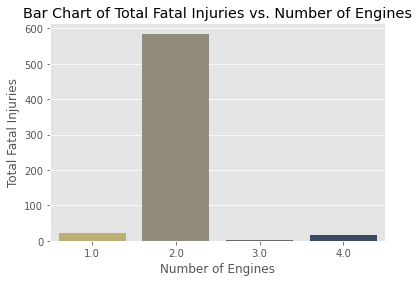

In [71]:
# Bar chart of 'total_fatal_injuries' against 'number_of_engines'
sns.barplot(x='number_of_engines', y='total_fatal_injuries', data=df, estimator=sum, ci=None, palette="cividis_r")

plt.xlabel('Number of Engines')
plt.ylabel('Total Fatal Injuries')
plt.title('Bar Chart of Total Fatal Injuries vs. Number of Engines')
plt.show()

***
This bar plot shows us how the number of engines on an aircraft is related to the total number of fatal injuries in accidents. Although this is showing us that most of the recorded accidents were in airplanes with two engines, we can also consider this plot as a way to show us what the most common engine count is for modern airplanes. When refrencing the amount of data I was left with after cleaning this dataset, we can see that airplanes with a two engine build take up a majority of the data. This is something we can keep in mind when looking deeper into what make and models pose the least amount of risk with a two engine build. 
***

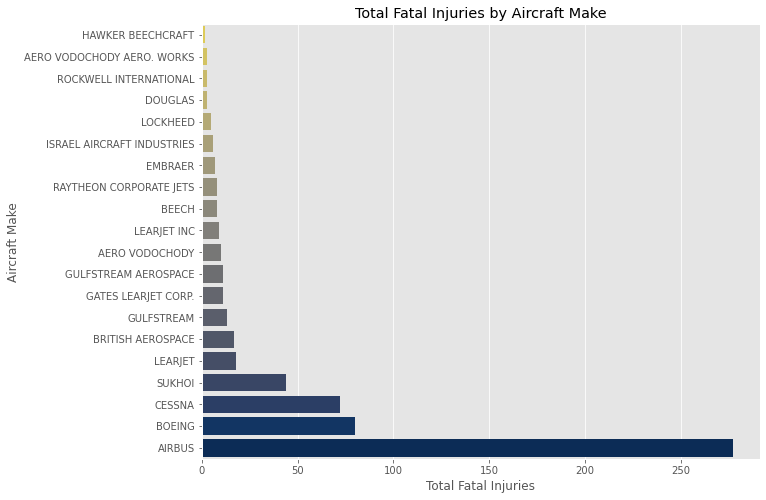

In [68]:
# Summing up total fatal injuries by make
total_fatal_by_make = df.groupby('make')['total_fatal_injuries'].sum().reset_index().sort_values(by='total_fatal_injuries', ascending=True)

# Keeping only the top 20 for a cleaner visualization
top_makes = total_fatal_by_make.tail(20)

plt.figure(figsize=(10, 8))
sns.barplot(x='total_fatal_injuries', y='make', data=top_makes, palette="cividis_r")
plt.title('Total Fatal Injuries by Aircraft Make')
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Aircraft Make')
plt.show()


***
Shown above, I have decided to look into the "total_fatal_injuries" sum for each manufacture and their respective branches. This has resulted in an output showing that some reputable manufactures have a very low sum of "total_fatal_injuries". Manufactures like Lockheed, Embraer, Raytheon Corporate Jets, Gulfstream, and Boeing. After doing a bit more research, I have found that Embraer manufactures many potential modern aircraft that pose as potential choices for the business problem at hand. You can take a look at some of the potential Embraer aircraft here (https://www.embraercommercialaviation.com/our-aircraft/). Embraer manufactures aircraft that can apply to both private and commercial enterprises. Depneding on the planned capacities for commercial aircraft.

If larger airplanes are required for the future commercial enterprise, I would recommend looking into manufactures like Boeing, or Airbus. Although Boeing and Airbus are on the higher side of this bar chart, I am only outputting the top 20 lowest sums of fatal injuries. It must also be mentioned that manufactures like Boeing and Airbus are highly common in the commercial flight. So there may be a higher number of recorded incidents in this dataset over some smaller manufactures that might charge more for their aircraft due to custom builds or quality differences. 

Potential larger airplanes manufactured by Boeing and Airbus can be seen here: 
Boeing - (https://www.boeing.com/company/about-bca#overview)
Airbus - (https://www.airbus.com/en/products-services/commercial-aircraft)
***

In [70]:
from scipy.stats import pearsonr

# Calculating Pearson's correlation coefficient
corr_coefficient, p_value = pearsonr(df['total_uninjured'].dropna(), df['number_of_engines'].dropna())

print(f"Pearson's Correlation Coefficient: {corr_coefficient}, P-value: {p_value}")

Pearson's Correlation Coefficient: 0.16225364085425956, P-value: 1.5453681343906036e-06


***
The correlation coefficient of approximately 0.162 suggests there is a small positive linear relationship between 'total_uninjured' and 'number_of_engines'. This means that as the number of engines increases, the number of uninjured people also increases slightly. However, the correlation is weak, and while the relationship is positive, it is not strong.

The p-value is much lower than the standard alpha level of 0.05 (in fact, it's significantly lower), which suggests that the correlation I found is statistically significant. This means that the likelihood of observing this correlation by random chance alone is very low, and there is a statistically significant linear relationship between the two variables in the sample I have analyzed.

So, while the strength of the relationship between the number of engines and the total number of uninjured individuals is not particularly strong (given the coefficient is much closer to 0 than to 1), there is enough evidence to suggest that the relationship is statistically significant and not due to random variation alone. 

With this now being known, I can now look into the sum of incidents for each engine type and number of engines to further support this information and create a visualization to support this new found statistic. 
***

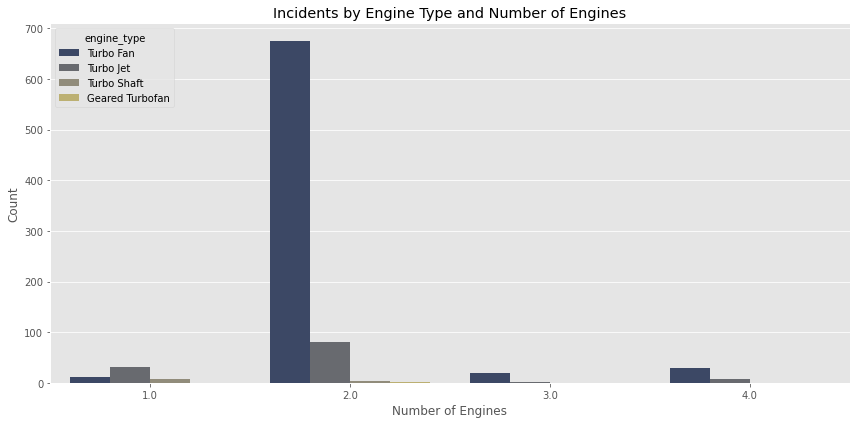

In [62]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='number_of_engines', hue='engine_type', palette='cividis')
plt.title('Incidents by Engine Type and Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Count')
plt.tight_layout()


***
This bar chart is showing us the number of incidents that have occurred per engine type and engine count. The data shows a substantial concentration of aircraft equipped with two engines. Within this category, Turbo Fan technology is the most prevalent. With this being known, I would recommend looking into aircraft with an engine count higher than two. If possible, with either a Turbo Fan or Turbo Jet engine platform, as these are shown to be the two most commonly used engine types. Turbo Jet engines show a lower sum of incidents overall.
***

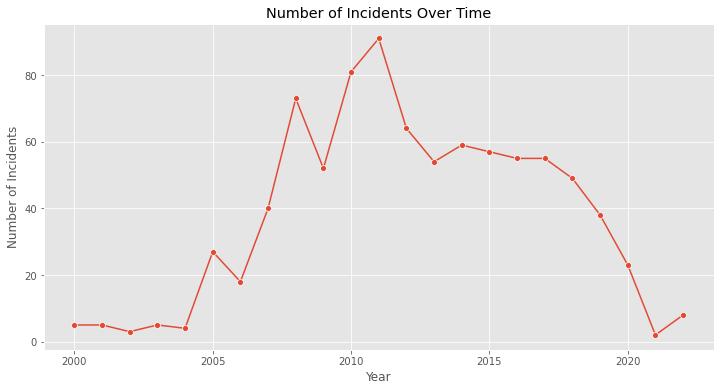

In [74]:
# Grouping by event_date year and counting incidents
incidents_per_year = df.groupby(df['event_date'].dt.year).size().reset_index(name='counts')

plt.figure(figsize=(12, 6))
sns.lineplot(x='event_date', y='counts', data=incidents_per_year, marker='o')
plt.title('Number of Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

***
Shown above, the line plot is showing that there was a very high volume of incidents starting in 2005, and beginning to drop off in 2015. For approximately a decade there was a high volume of indidents being recorded for airplanes specifically. The signifcant drop in recorded incidents should be notes as well. This could be due to new standards and procedures implemented to prevent a high volume of incidents occuring like it was the past 10 years. It could also be due to technological advancements in aircraft manufacturing that also assist in preventing crashes or incidents. 

It is a logical choice to consider aircraft built from 2015 to our current year based of the results shown in this line plot.
***

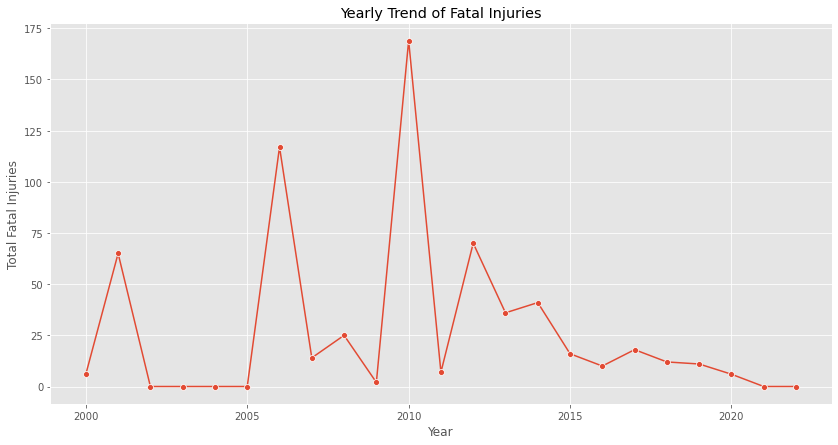

In [75]:
# Grouping by event_date year and counting incidents
df['year'] = df['event_date'].dt.year
injuries_over_years = df.groupby('year')['total_fatal_injuries'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='total_fatal_injuries', data=injuries_over_years, marker='o')
plt.title('Yearly Trend of Fatal Injuries')
plt.xlabel('Year')
plt.ylabel('Total Fatal Injuries')
plt.show()


***
The same can be said for a yearly trend of fatal injuries. It can be noted that the peak is shown to be in the same year as line plot before. This further confirms our knowledge of a very high concetration of indidents between 2010 and 2015. It can also be noted that there is a noticable drop off in 2015, suggesting the same regarding a change in saftey, procedures, and further innovation in aircraft technology to prevent this from happeneing in such a high concentration. 
***

***
## Evaluation
Following a comprehensive process of data preparation, cleaning, and analytical modeling, I have three business recommendations to suggest. The analysis has distilled a list of prospective aircraft, each with the potential to serve effectively in commercial and private aviation enterprises. The manufacturers represented in the findings are renowned for their commitment to safety and reliability. The highlighted models are designed to accommodate a range of passenger capacities and are capable of traversing medium to long-haul routes efficiently.

Implementing this model into the business's decision-making process is anticipated to yield positive outcomes. The actionable insights derived from the analysis promise to enhance the strategic selection of aircraft, optimizing the balance between capacity, range, and safety. Nonetheless, it is essential to integrate these findings with a comprehensive risk assessment and to consider them as part of a broader decision framework that includes economic, technical, and regulatory factors.
***

### Conclusions
Through meticulous data preparation, cleansing, and analytical modeling, I have distilled a set of actionable insights and robust aircraft model recommendations tailored to the needs of the business. Our analysis has resulted in several potential models that align with both commercial and private operational requirements, emphasizing safety, reliability, and operational efficiency.
***
### Recommendations

Based on the findings of my analysis, it is recommended that the business consider the following:

1. For commercial aircraft, I recommend choosing an airplane manufactured from the following three manufactures: 
    - Embraer
    - Boeing
    - Airbus
The three above aircraft manufactures are in the Top 20 lowest sum of "total_fatal_injuries", as shown in the bar chart above. All three of the listed manufactures produce and sell highly potential aircraft for commercial enterprises.

For private aircraft, I recommend choosing an airplane manufactured from the following three manufactures:
- Embraer
- Raytheon Corporate Jets 
- Gulfstream
The three above aircraft manufactures also are in the Top 20 lowest sum of "total_fatal_injuries", these manufactures also happen to be some of the most reputable private airplane manufactures known at this time. 

2. Based of my findings in my analysis, I also recommend considering aircraft from the listed manufactures above, that are built with an engine count of 3 or higher, as shown in my chart earlier in my notebook, aricraft with a engine count higher than two have a significantly lower indicdent rate as well as a fatality rate. Airplanes with a Turbo Fan or Turbo Jet engine build should also be considered as these are the most commonly used. Turbo Jet builds show a lower sum of recorded indicents, this should be noted. 

3. Lastly, the business should consider choosing aircraft built from 2015 to current time. This will ensure that the aircraft chosen for both commercial and private enterprises will be up to date, and will have modern innovations implemented in their technology to better assist in preventing incidents or crashes. 

***
### Limitations

While the analysis provides a data-driven foundation for decision-making, several limitations must be acknowledged:

Historical data may not account for recent improvements in aircraft design and technology that enhance safety.
The analysis might not fully capture the operational diversity of aircraft usage, which can significantly impact safety outcomes.
External factors such as regulatory changes and maintenance practices, which play a crucial role in aircraft safety, have not been extensively analyzed.
***
### Future Improvements

To further refine the recommendations for this business problem and create an up-to-date analysis, the following steps could be utilized in the future:

Incorporate real-time data tracking to capture the latest trends and improvements in aircraft safety and performance.
Expand the scope of analysis to include a broader range of safety and performance metrics, offering a more comprehensive view of each aircraft model's operational profile.

In essence, while the analysis conducted provides a solid foundation for informed decision-making, it is crucial to approach the recommendations with an understanding of their inherent constraints and the dynamic nature of aviation safety. Continuous improvement in data collection, analysis techniques, and the incorporation of real-time operational data will significantly enhance the robustness of future recommendations.

It is also important to consider that due to the state and quantity of the data provided in the original dataset when choosing Airplane models, the possibility of a new version of the specific model should be considered. This can be resolved when communicating with sales representatives of the manufacture you choose for each industry. 
